Running Copper Waveguide Analysis
STRUCTURE SPECIFICATIONS:
Layer Stack (Bottom to Top):
  • Si Substrate: 5.0 μm
  • Poly Silicon: 3.0 μm (middle layer)
  • SiO₂: 2.0 μm (top layer)
  • Cu Waveguides: on top of SiO₂

Waveguide Dimensions:
  • WG1: 130.0 μm Cu
  • WG2: 15.0-120.0 μm Cu
  • WG3: 130.0 μm Cu
  • Height: 3.0 μm, Gap: 10.0 μm

Analysis Parameters:
  • Voltage: -1.0 to 1.0 V
  • Frequency: 1.0 to 10.0 GHz

1. Waveguide Structure with Corrected Layer Order


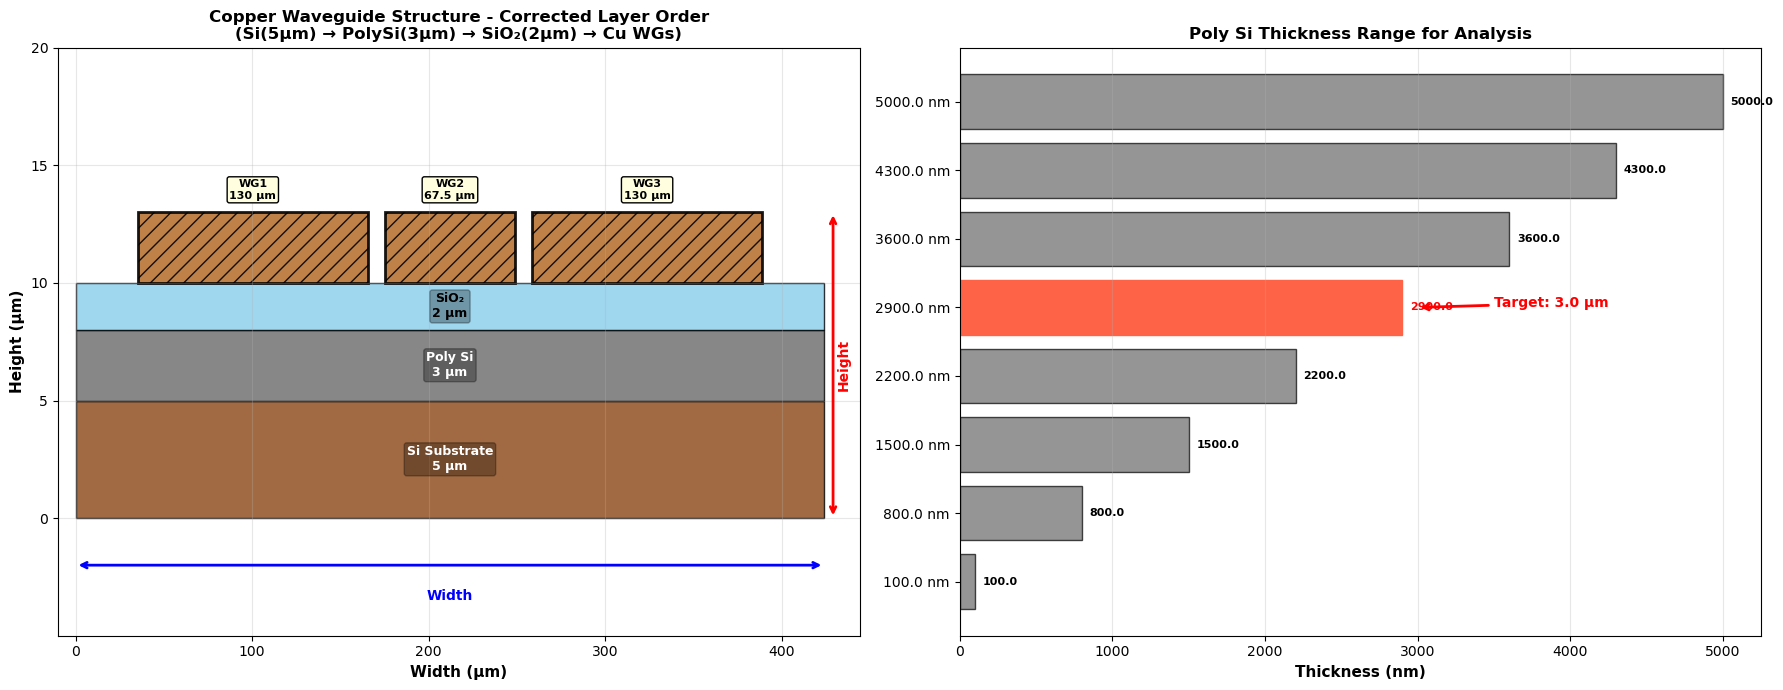


2. W2 Width Variations


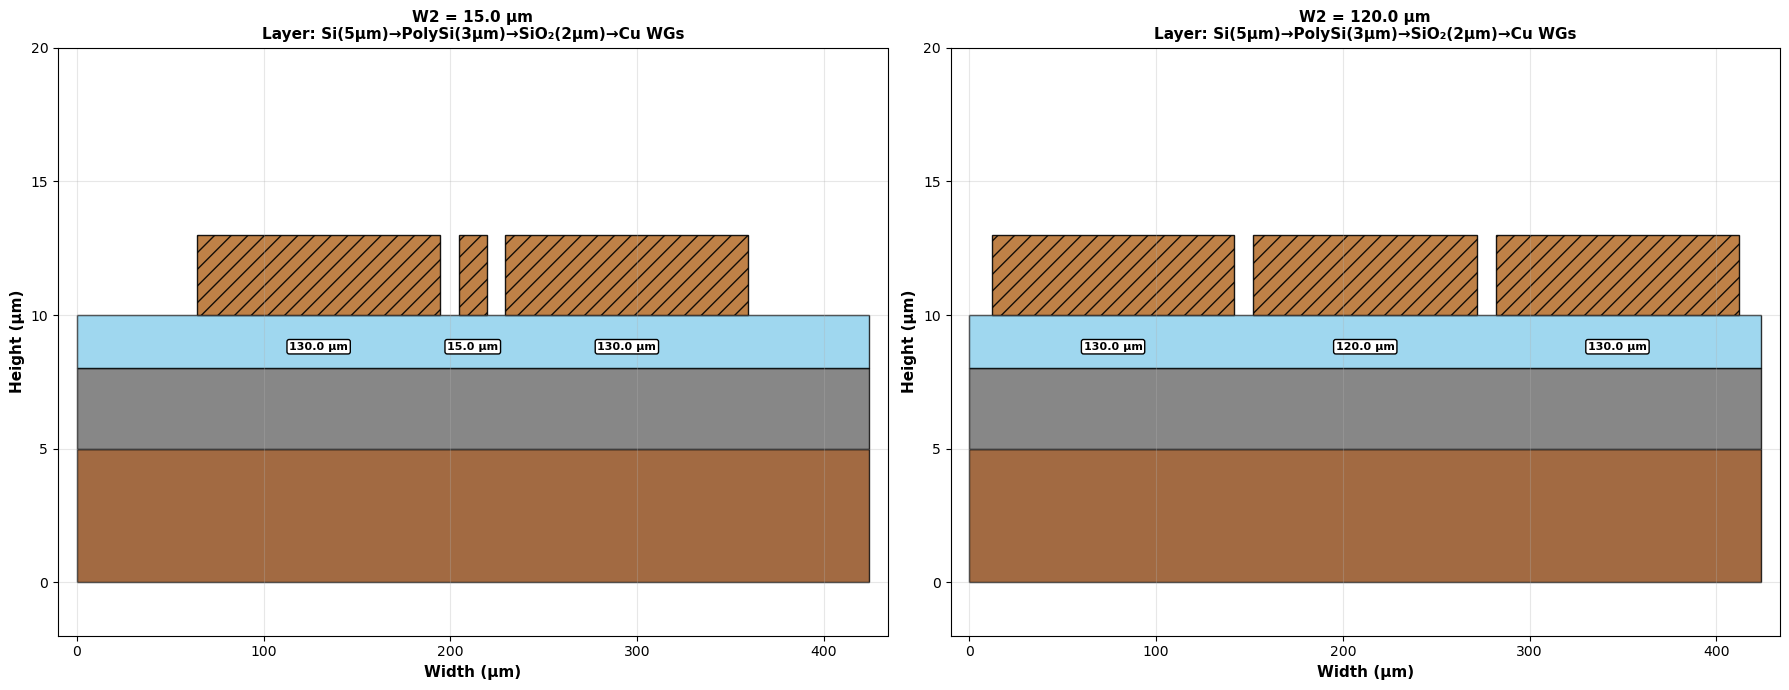


3. Conductivity Analysis in Poly Si


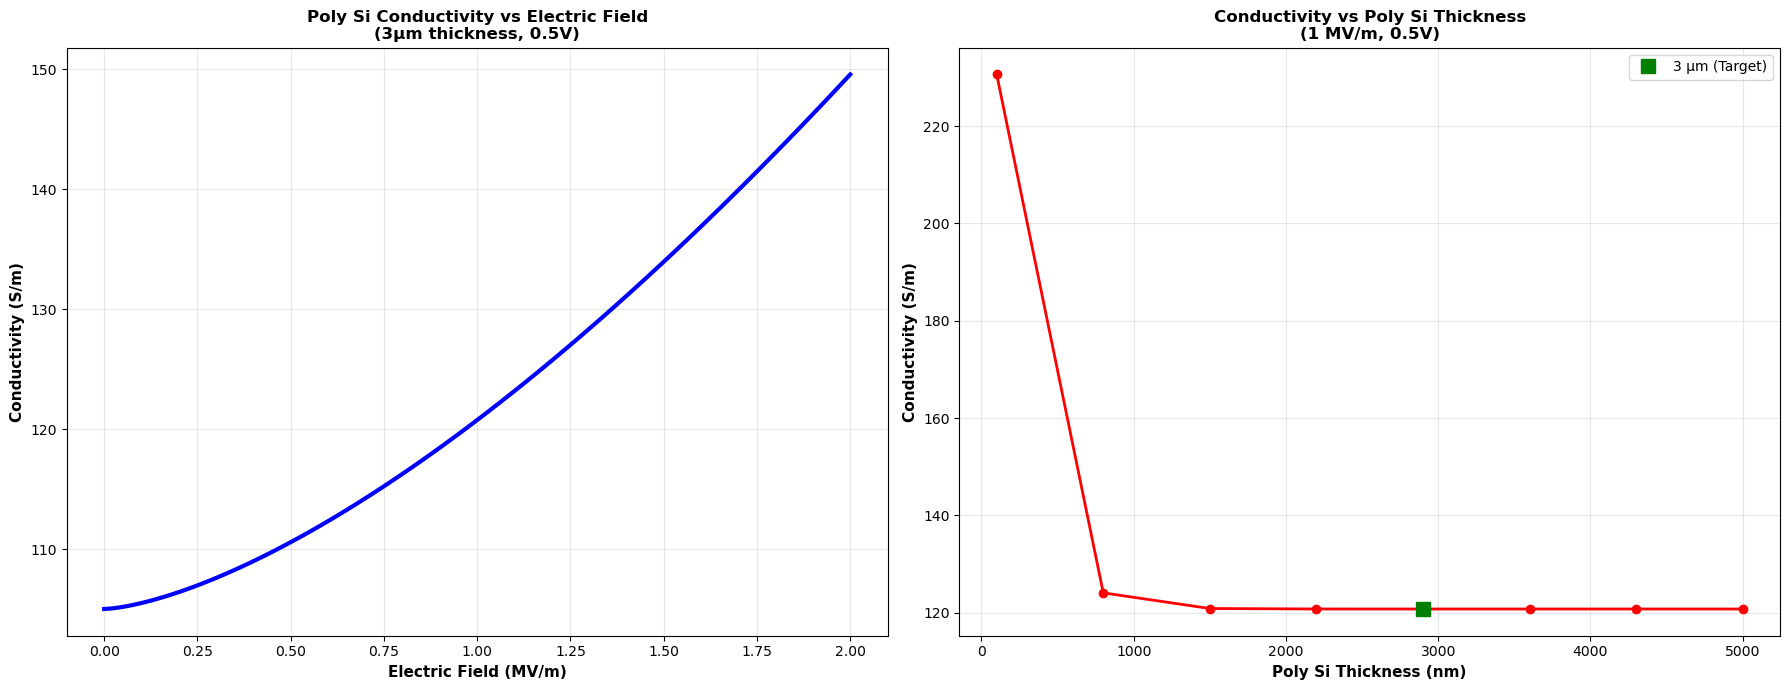


4. Voltage Dependence Analysis


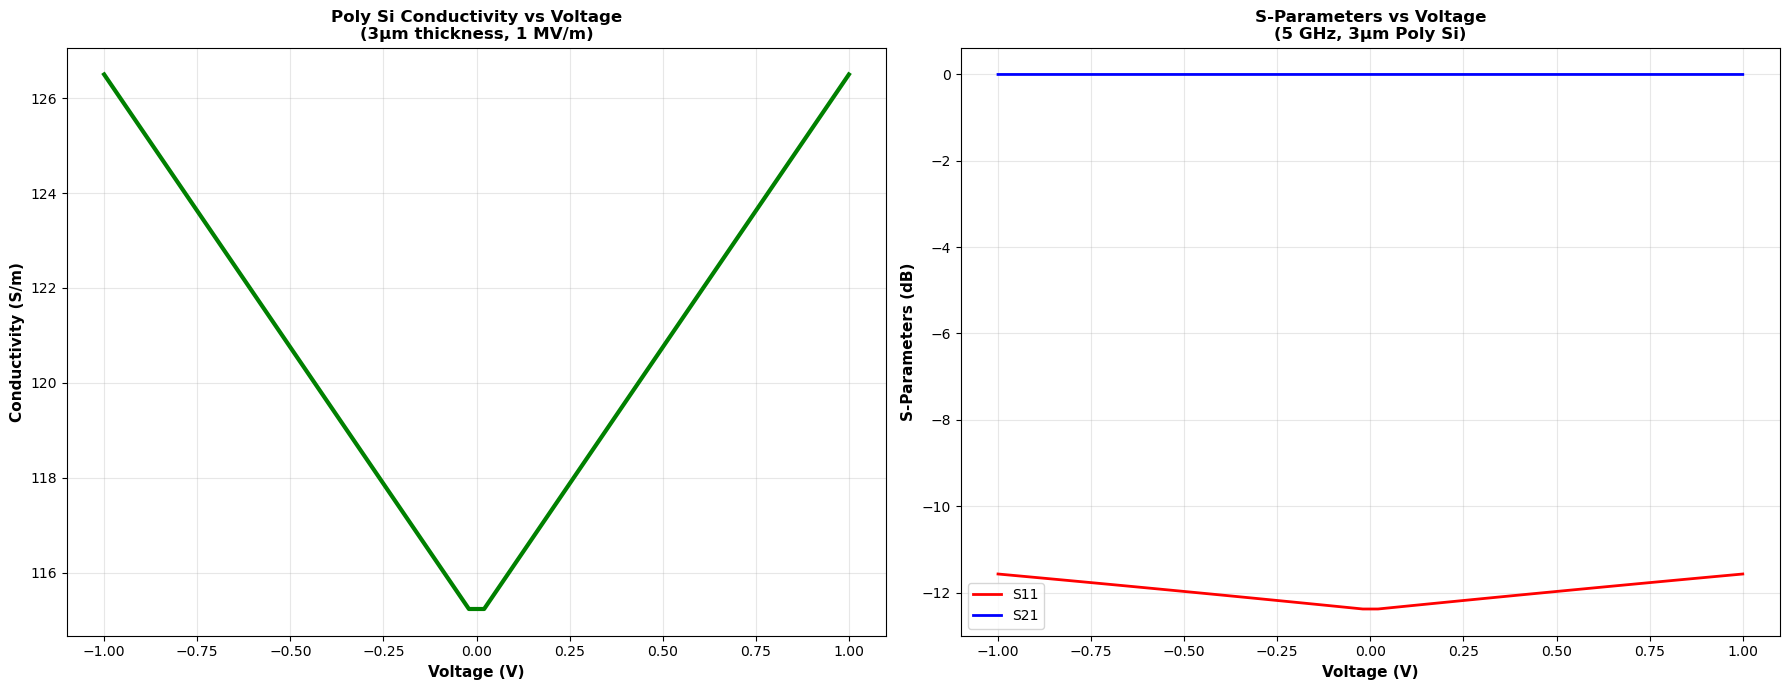


5. Frequency Domain Analysis


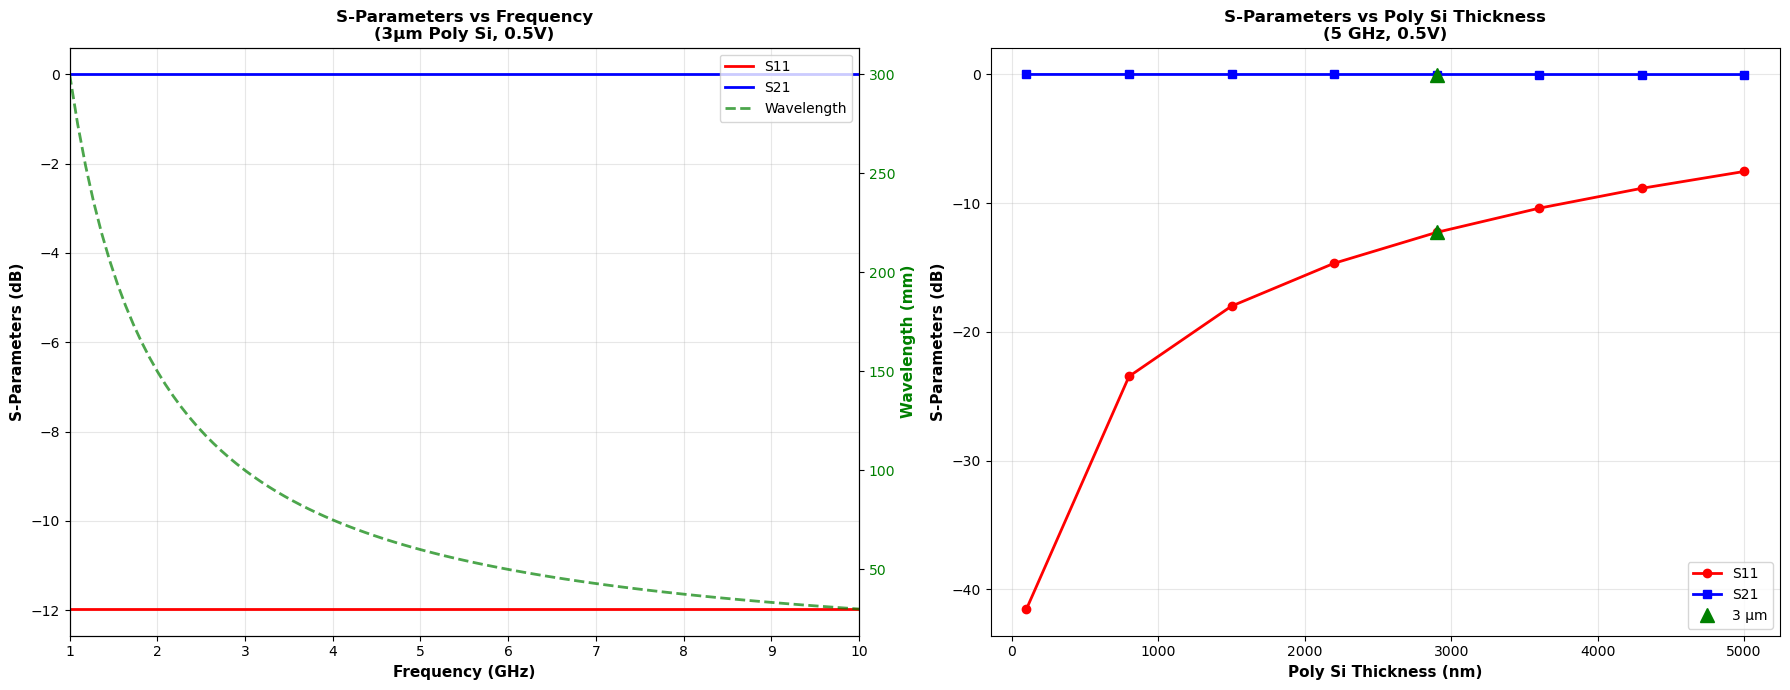


6. Comprehensive Parameter Analysis


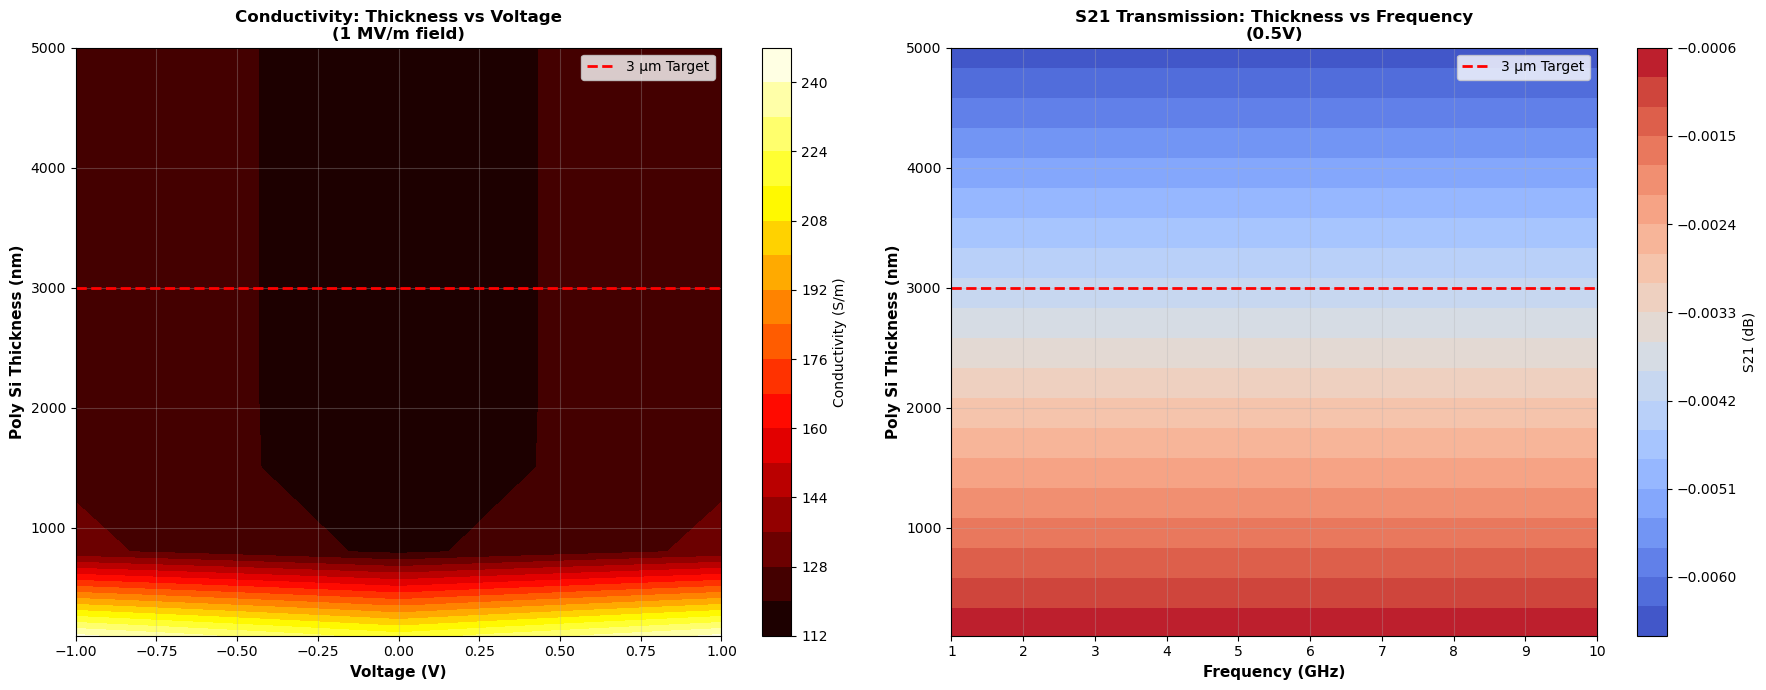


ANALYSIS COMPLETE!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, epsilon_0, mu_0
import matplotlib.patches as patches

class CopperWaveguideAnalysis:
    def __init__(self):
        # Physical constants
        self.c = c  # 3e8 m/s
        self.epsilon_0 = epsilon_0
        self.mu_0 = mu_0
        
        # Copper properties
        self.sigma_cu = 5.96e7    # Copper conductivity (S/m)
        
        # Material refractive indices
        self.n_si = 3.45          # Silicon
        self.n_polysi = 3.50      # Poly Silicon  
        self.n_sio2 = 1.45        # SiO2 (BOX)
        
        # Copper Waveguide dimensions (meters)
        self.W1 = 130e-6          # Width WG1 - Copper
        self.W2_range = np.linspace(15e-6, 120e-6, 10)  # WG2 width range
        self.W3 = 130e-6          # Width WG3 - Copper
        self.H = 3e-6             # Height all waveguides
        self.L = 4e-3             # Length all waveguides
        self.gap = 10e-6          # Gap between waveguides
        
        # Layer thicknesses - UPDATED AS PER INSTRUCTIONS
        self.t_si = 5e-6          # Si substrate thickness - CHANGED from 200μm to 5μm
        self.t_polysi = 3e-6      # Poly Si thickness - SET to 3μm (middle layer)
        self.t_sio2 = 2e-6        # SiO2 thickness - SET to 2μm (top layer)
        
        # Poly Si thickness range for analysis (kept for conductivity analysis)
        self.t_polysi_range = np.linspace(0.1e-6, 5e-6, 8)  # Extended range for analysis
        
        # Simulation parameters
        self.freq_range = np.linspace(1e9, 10e9, 100)  # 1-10 GHz
        self.voltage_range = np.linspace(-1, 1, 50)    # -1V to +1V
        
        # Calculate wavelength range
        self.wavelength_range = self.c / self.freq_range

    def polysi_conductivity(self, E_x, E_y, t_polysi, voltage):
        """Conductivity in Poly Si region with voltage dependence"""
        sigma_0 = 100  # Base conductivity (S/m)
        E_magnitude = np.sqrt(E_x**2 + E_y**2)
        
        # Field-dependent component
        field_factor = 1 + 0.15 * (E_magnitude / 1e6)**1.5
        
        # Thickness-dependent component
        thickness_factor = 1 + 1.5 * np.exp(-t_polysi / 0.2e-6)
        
        # Voltage-dependent component
        voltage_factor = 1 + 0.1 * abs(voltage)
        
        return sigma_0 * field_factor * thickness_factor * voltage_factor

    def s_parameters(self, freq, width, t_polysi, voltage):
        """Calculate S-parameters for the system"""
        # Propagation constant approximation
        wavelength = self.c / freq
        beta = 2 * np.pi * self.n_polysi / wavelength
        
        L_eff = self.L
        alpha_db = 0.1 + 0.3 * (t_polysi/1e-6) + 0.05 * abs(voltage)
        alpha_np = alpha_db / 8.686
        
        # Transmission and reflection
        S21 = np.exp(-(alpha_np + 1j * beta) * L_eff)
        S11 = 0.08 * (t_polysi/1e-6) * np.exp(1j * np.pi/4) * (1 + 0.1 * abs(voltage))
        
        return np.abs(S11), np.abs(S21)

    def plot_structure_1(self):
        """Plot 1: Complete waveguide structure with CORRECTED LAYERS"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Colors
        colors = {
            'si': '#8B4513',      # Brown - Silicon Substrate
            'polysi': '#696969',  # Gray - Poly Si (middle layer)
            'sio2': '#87CEEB',    # Light Blue - SiO2 (top layer)
            'cu_wg': '#B87333'    # Copper - Waveguides
        }
        
        W2 = self.W2_range[5]
        
        # Calculate total width for waveguides with gaps
        total_waveguide_width = self.W1 + self.gap + W2 + self.gap + self.W3
        available_width = 424e-6  # Use 424μm as base width
        left_margin = (available_width - total_waveguide_width) / 2
        
        # Total structure height
        base_height = self.t_si + self.t_polysi + self.t_sio2
        total_height = base_height + self.H
        
        # Plot 1: Main structure - CORRECTED LAYER ORDER
        # Draw substrate layers FROM BOTTOM TO TOP
        layers = [
            (0, self.t_si, colors['si'], 'Si Substrate', '5 μm'),
            (self.t_si, self.t_polysi, colors['polysi'], 'Poly Si', '3 μm'),
            (self.t_si + self.t_polysi, self.t_sio2, colors['sio2'], 'SiO₂', '2 μm')
        ]
        
        for y_start, thickness, color, name, dim in layers:
            rect = patches.Rectangle((0, y_start), available_width, thickness,
                                   facecolor=color, alpha=0.8, edgecolor='black', linewidth=1)
            ax1.add_patch(rect)
            
            # Layer label - placed inside layers
            label_y = y_start + thickness / 2
            ax1.text(available_width/2, label_y, f'{name}\n{dim}', 
                    ha='center', va='center', fontweight='bold', fontsize=9,
                    color='white' if name != 'SiO₂' else 'black',
                    bbox=dict(boxstyle="round,pad=0.2", facecolor="black", alpha=0.3))
        
        # Draw copper waveguides on TOP of SiO2
        wg_positions = [
            (left_margin, self.W1, 'WG1', '130 μm'),
            (left_margin + self.W1 + self.gap, W2, 'WG2', '67.5 μm'),
            (left_margin + self.W1 + self.gap + W2 + self.gap, self.W3, 'WG3', '130 μm')
        ]
        
        for x_start, width, label, dim in wg_positions:
            rect = patches.Rectangle((x_start, base_height), width, self.H,
                                   facecolor=colors['cu_wg'], alpha=0.9, edgecolor='black',
                                   hatch='//', linewidth=2)
            ax1.add_patch(rect)
            
            # Waveguide label - above waveguide
            label_y = base_height + self.H + 0.5e-6
            ax1.text(x_start + width/2, label_y, f'{label}\n{dim}', 
                    ha='center', va='bottom', fontweight='bold', fontsize=8,
                    bbox=dict(boxstyle="round,pad=0.2", facecolor="lightyellow"))
        
        # Add dimension lines
        # Height scale
        ax1.annotate('', xy=(available_width + 5e-6, 0), 
                    xytext=(available_width + 5e-6, total_height),
                    arrowprops=dict(arrowstyle='<->', color='red', lw=2))
        ax1.text(available_width + 7e-6, total_height/2, 'Height', 
                ha='left', va='center', fontweight='bold', fontsize=10, color='red', rotation=90)
        
        # Width scale
        ax1.annotate('', xy=(0, -2e-6), 
                    xytext=(available_width, -2e-6),
                    arrowprops=dict(arrowstyle='<->', color='blue', lw=2))
        ax1.text(available_width/2, -3e-6, 'Width', 
                ha='center', va='top', fontweight='bold', fontsize=10, color='blue')
        
        ax1.set_xlabel('Width (μm)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('Height (μm)', fontweight='bold', fontsize=11)
        ax1.set_title('Copper Waveguide Structure - Corrected Layer Order\n(Si(5μm) → PolySi(3μm) → SiO₂(2μm) → Cu WGs)', 
                     fontweight='bold', fontsize=12)
        ax1.grid(True, alpha=0.3)
        
        # Set axis limits with margins
        ax1.set_xlim(-10e-6, available_width + 20e-6)
        ax1.set_ylim(-5e-6, total_height + 5e-6)
        
        # Convert to micrometers
        ax1.set_xticks(np.arange(0, available_width + 50e-6, 100e-6))
        ax1.set_xticklabels([f'{x*1e6:.0f}' for x in np.arange(0, available_width + 50e-6, 100e-6)])
        
        y_ticks = np.arange(0, total_height + 10e-6, 5e-6)
        ax1.set_yticks(y_ticks)
        ax1.set_yticklabels([f'{y*1e6:.0f}' for y in y_ticks])
        
        # Plot 2: Layer thickness variants for analysis
        thickness_nm = [t * 1e9 for t in self.t_polysi_range]
        y_pos = np.arange(len(thickness_nm))
        
        bars = ax2.barh(y_pos, thickness_nm, color=colors['polysi'], alpha=0.7, edgecolor='black')
        ax2.set_yticks(y_pos)
        ax2.set_yticklabels([f'{t:.1f} nm' for t in thickness_nm])
        ax2.set_xlabel('Thickness (nm)', fontweight='bold', fontsize=11)
        ax2.set_title('Poly Si Thickness Range for Analysis', fontweight='bold', fontsize=12)
        ax2.grid(True, alpha=0.3, axis='x')
        
        # Highlight the 3μm point
        target_thickness = 3e-9  # 3μm in nm
        target_idx = np.argmin(np.abs(np.array(thickness_nm) - 3000))  # Find closest to 3000nm
        bars[target_idx].set_color('#FF6347')  # Highlight in red
        bars[target_idx].set_alpha(1.0)
        
        # Add values on bars
        for i, (bar, value) in enumerate(zip(bars, thickness_nm)):
            color = 'red' if i == target_idx else 'black'
            ax2.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2, 
                    f'{value:.1f}', va='center', fontweight='bold', fontsize=8, color=color)
        
        # Add annotation for target thickness
        ax2.annotate('Target: 3.0 μm', xy=(3000, target_idx), xytext=(3500, target_idx),
                    arrowprops=dict(arrowstyle='->', color='red', lw=2),
                    fontweight='bold', fontsize=10, color='red')
        
        plt.tight_layout()
        plt.show()

    def plot_structure_2(self):
        """Plot 2: W2 width variations with CORRECTED LAYERS"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        colors = {
            'si': '#8B4513',      # Brown - Silicon
            'polysi': '#696969',  # Gray - Poly Si
            'sio2': '#87CEEB',    # Light Blue - SiO2
            'cu_wg': '#B87333'    # Copper
        }
        
        # Select two W2 cases
        w2_cases = [0, 9]  # min and max
        available_width = 424e-6
        
        for idx, w2_idx in enumerate(w2_cases):
            ax = ax1 if idx == 0 else ax2
            W2 = self.W2_range[w2_idx]
            
            # Calculate waveguide positions
            total_waveguide_width = self.W1 + self.gap + W2 + self.gap + self.W3
            left_margin = (available_width - total_waveguide_width) / 2
            
            base_height = self.t_si + self.t_polysi + self.t_sio2
            total_height = base_height + self.H
            
            # Draw layers FROM BOTTOM TO TOP
            layers = [
                (0, self.t_si, colors['si']),
                (self.t_si, self.t_polysi, colors['polysi']),
                (self.t_si + self.t_polysi, self.t_sio2, colors['sio2'])
            ]
            
            for y_start, thickness, color in layers:
                rect = patches.Rectangle((0, y_start), available_width, thickness,
                                       facecolor=color, alpha=0.8, edgecolor='black')
                ax.add_patch(rect)
            
            # Draw copper waveguides
            wg_data = [
                (left_margin, self.W1),
                (left_margin + self.W1 + self.gap, W2),
                (left_margin + self.W1 + self.gap + W2 + self.gap, self.W3)
            ]
            
            for x_start, width in wg_data:
                wg_rect = patches.Rectangle((x_start, base_height), width, self.H,
                                          facecolor=colors['cu_wg'], alpha=0.9, edgecolor='black',
                                          hatch='//')
                ax.add_patch(wg_rect)
                
                # Width label
                ax.text(x_start + width/2, base_height - 1e-6, f'{width*1e6:.1f} μm',
                       ha='center', va='top', fontweight='bold', fontsize=8,
                       bbox=dict(boxstyle="round,pad=0.2", facecolor="white"))
            
            ax.set_xlabel('Width (μm)', fontweight='bold', fontsize=11)
            ax.set_ylabel('Height (μm)', fontweight='bold', fontsize=11)
            ax.set_title(f'W2 = {W2*1e6:.1f} μm\nLayer: Si(5μm)→PolySi(3μm)→SiO₂(2μm)→Cu WGs', 
                         fontweight='bold', fontsize=11)
            ax.grid(True, alpha=0.3)
            
            ax.set_xlim(-10e-6, available_width + 10e-6)
            ax.set_ylim(-2e-6, total_height + 2e-6)
            
            # Convert to micrometers
            x_ticks = np.arange(0, available_width + 50e-6, 100e-6)
            ax.set_xticks(x_ticks)
            ax.set_xticklabels([f'{x*1e6:.0f}' for x in x_ticks])
            
            y_ticks = np.arange(0, total_height + 10e-6, 5e-6)
            ax.set_yticks(y_ticks)
            ax.set_yticklabels([f'{y*1e6:.0f}' for y in y_ticks])
        
        plt.tight_layout()
        plt.show()

    def plot_conductivity_analysis(self):
        """Plot 3: Conductivity analysis in Poly Si"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Plot 1: Conductivity vs Electric Field
        E_range = np.linspace(0, 2e6, 100)
        fixed_voltage = 0.5
        
        # Use the fixed 3μm Poly Si thickness
        conductivity = [self.polysi_conductivity(E, 0, self.t_polysi, fixed_voltage) 
                       for E in E_range]
        
        ax1.plot(E_range/1e6, conductivity, 'b-', linewidth=3)
        ax1.set_xlabel('Electric Field (MV/m)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('Conductivity (S/m)', fontweight='bold', fontsize=11)
        ax1.set_title('Poly Si Conductivity vs Electric Field\n(3μm thickness, 0.5V)', 
                     fontweight='bold', fontsize=12)
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Conductivity vs Thickness (analysis range)
        thickness_nm = [t * 1e9 for t in self.t_polysi_range]
        fixed_E = 1e6
        fixed_voltage = 0.5
        
        conductivity_thickness = [self.polysi_conductivity(fixed_E, 0, t, fixed_voltage) 
                                for t in self.t_polysi_range]
        
        ax2.plot(thickness_nm, conductivity_thickness, 'ro-', linewidth=2, markersize=6)
        ax2.set_xlabel('Poly Si Thickness (nm)', fontweight='bold', fontsize=11)
        ax2.set_ylabel('Conductivity (S/m)', fontweight='bold', fontsize=11)
        ax2.set_title('Conductivity vs Poly Si Thickness\n(1 MV/m, 0.5V)', 
                     fontweight='bold', fontsize=12)
        ax2.grid(True, alpha=0.3)
        
        # Highlight the 3μm point
        target_idx = np.argmin(np.abs(np.array(thickness_nm) - 3000))
        ax2.plot(thickness_nm[target_idx], conductivity_thickness[target_idx], 'gs', 
                markersize=10, label='3 μm (Target)')
        ax2.legend(fontsize=10)
        
        plt.tight_layout()
        plt.show()

    def plot_voltage_analysis(self):
        """Plot 4: Voltage dependence analysis"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Plot 1: Conductivity vs Voltage
        fixed_E = 1e6
        
        conductivity_voltage = [self.polysi_conductivity(fixed_E, 0, self.t_polysi, V) 
                              for V in self.voltage_range]
        
        ax1.plot(self.voltage_range, conductivity_voltage, 'g-', linewidth=3)
        ax1.set_xlabel('Voltage (V)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('Conductivity (S/m)', fontweight='bold', fontsize=11)
        ax1.set_title('Poly Si Conductivity vs Voltage\n(3μm thickness, 1 MV/m)', 
                     fontweight='bold', fontsize=12)
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: S-parameters vs Voltage
        fixed_freq = 5e9
        fixed_width = self.W1
        
        S11_voltage = []
        S21_voltage = []
        
        for V in self.voltage_range:
            S11, S21 = self.s_parameters(fixed_freq, fixed_width, self.t_polysi, V)
            S11_voltage.append(20 * np.log10(S11 + 1e-12))
            S21_voltage.append(20 * np.log10(S21 + 1e-12))
        
        ax2.plot(self.voltage_range, S11_voltage, 'r-', linewidth=2, label='S11')
        ax2.plot(self.voltage_range, S21_voltage, 'b-', linewidth=2, label='S21')
        ax2.set_xlabel('Voltage (V)', fontweight='bold', fontsize=11)
        ax2.set_ylabel('S-Parameters (dB)', fontweight='bold', fontsize=11)
        ax2.set_title('S-Parameters vs Voltage\n(5 GHz, 3μm Poly Si)', 
                     fontweight='bold', fontsize=12)
        ax2.legend(fontsize=10)
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

    def plot_frequency_analysis(self):
        """Plot 5: Frequency domain analysis"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Plot 1: S-parameters vs Frequency
        fixed_voltage = 0.5
        fixed_width = self.W1
        
        S11_freq = []
        S21_freq = []
        
        for freq in self.freq_range:
            S11, S21 = self.s_parameters(freq, fixed_width, self.t_polysi, fixed_voltage)
            S11_freq.append(20 * np.log10(S11 + 1e-12))
            S21_freq.append(20 * np.log10(S21 + 1e-12))
        
        ax1.plot(self.freq_range/1e9, S11_freq, 'r-', linewidth=2, label='S11')
        ax1.plot(self.freq_range/1e9, S21_freq, 'b-', linewidth=2, label='S21')
        ax1.set_xlabel('Frequency (GHz)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('S-Parameters (dB)', fontweight='bold', fontsize=11)
        ax1.set_title('S-Parameters vs Frequency\n(3μm Poly Si, 0.5V)', 
                     fontweight='bold', fontsize=12)
        ax1.legend(fontsize=10)
        ax1.grid(True, alpha=0.3)
        ax1.set_xlim(1, 10)
        
        # Plot 2: Wavelength vs Frequency
        ax2_twin = ax1.twinx()
        wavelength_mm = self.wavelength_range * 1000
        ax2_twin.plot(self.freq_range/1e9, wavelength_mm, 'g--', linewidth=2, alpha=0.7, label='Wavelength')
        ax2_twin.set_ylabel('Wavelength (mm)', fontweight='bold', fontsize=11, color='green')
        ax2_twin.tick_params(axis='y', labelcolor='green')
        
        # Combine legends
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2_twin.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
        
        # Plot 2: Thickness effects on S-parameters (analysis range)
        fixed_freq = 5e9
        fixed_voltage = 0.5
        fixed_width = self.W1
        
        thickness_nm = [t * 1e9 for t in self.t_polysi_range]
        S11_thickness = []
        S21_thickness = []
        
        for t_polysi in self.t_polysi_range:
            S11, S21 = self.s_parameters(fixed_freq, fixed_width, t_polysi, fixed_voltage)
            S11_thickness.append(20 * np.log10(S11 + 1e-12))
            S21_thickness.append(20 * np.log10(S21 + 1e-12))
        
        ax2.plot(thickness_nm, S11_thickness, 'ro-', linewidth=2, markersize=6, label='S11')
        ax2.plot(thickness_nm, S21_thickness, 'bs-', linewidth=2, markersize=6, label='S21')
        ax2.set_xlabel('Poly Si Thickness (nm)', fontweight='bold', fontsize=11)
        ax2.set_ylabel('S-Parameters (dB)', fontweight='bold', fontsize=11)
        ax2.set_title('S-Parameters vs Poly Si Thickness\n(5 GHz, 0.5V)', 
                     fontweight='bold', fontsize=12)
        ax2.legend(fontsize=10)
        ax2.grid(True, alpha=0.3)
        
        # Highlight the 3μm point
        target_idx = np.argmin(np.abs(np.array(thickness_nm) - 3000))
        ax2.plot(thickness_nm[target_idx], S11_thickness[target_idx], 'g^', markersize=10, label='3 μm')
        ax2.plot(thickness_nm[target_idx], S21_thickness[target_idx], 'g^', markersize=10)
        ax2.legend(fontsize=10)
        
        plt.tight_layout()
        plt.show()

    def plot_comprehensive_analysis(self):
        """Plot 6: Comprehensive parameter analysis"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Plot 1: 2D Conductivity map (Thickness vs Voltage)
        thickness_nm = [t * 1e9 for t in self.t_polysi_range]
        fixed_E = 1e6
        
        conductivity_map = np.zeros((len(self.t_polysi_range), len(self.voltage_range)))
        
        for i, t_polysi in enumerate(self.t_polysi_range):
            for j, V in enumerate(self.voltage_range):
                conductivity_map[i, j] = self.polysi_conductivity(fixed_E, 0, t_polysi, V)
        
        im = ax1.contourf(self.voltage_range, thickness_nm, conductivity_map, levels=20, cmap='hot')
        plt.colorbar(im, ax=ax1, label='Conductivity (S/m)')
        
        ax1.set_xlabel('Voltage (V)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('Poly Si Thickness (nm)', fontweight='bold', fontsize=11)
        ax1.set_title('Conductivity: Thickness vs Voltage\n(1 MV/m field)', 
                     fontweight='bold', fontsize=12)
        ax1.grid(True, alpha=0.3)
        
        # Mark the 3μm point
        ax1.axhline(y=3000, color='red', linestyle='--', linewidth=2, label='3 μm Target')
        ax1.legend(fontsize=10)
        
        # Plot 2: 2D S21 map (Thickness vs Frequency)
        fixed_voltage = 0.5
        fixed_width = self.W1
        
        S21_map = np.zeros((len(self.t_polysi_range), len(self.freq_range)))
        
        for i, t_polysi in enumerate(self.t_polysi_range):
            for j, freq in enumerate(self.freq_range):
                _, S21 = self.s_parameters(freq, fixed_width, t_polysi, fixed_voltage)
                S21_map[i, j] = 20 * np.log10(S21 + 1e-12)
        
        im2 = ax2.contourf(self.freq_range/1e9, thickness_nm, S21_map, levels=20, cmap='coolwarm')
        plt.colorbar(im2, ax=ax2, label='S21 (dB)')
        
        ax2.set_xlabel('Frequency (GHz)', fontweight='bold', fontsize=11)
        ax2.set_ylabel('Poly Si Thickness (nm)', fontweight='bold', fontsize=11)
        ax2.set_title('S21 Transmission: Thickness vs Frequency\n(0.5V)', 
                     fontweight='bold', fontsize=12)
        ax2.grid(True, alpha=0.3)
        
        # Mark the 3μm point
        ax2.axhline(y=3000, color='red', linestyle='--', linewidth=2, label='3 μm Target')
        ax2.legend(fontsize=10)
        
        plt.tight_layout()
        plt.show()

    def run_analysis(self):
        """Run complete analysis"""
        print("Running Copper Waveguide Analysis")
        print("=" * 60)
        
        print("STRUCTURE SPECIFICATIONS:")
        print(f"Layer Stack (Bottom to Top):")
        print(f"  • Si Substrate: {self.t_si*1e6} μm")
        print(f"  • Poly Silicon: {self.t_polysi*1e6} μm (middle layer)")
        print(f"  • SiO₂: {self.t_sio2*1e6} μm (top layer)")
        print(f"  • Cu Waveguides: on top of SiO₂")
        print(f"\nWaveguide Dimensions:")
        print(f"  • WG1: {self.W1*1e6} μm Cu")
        print(f"  • WG2: {self.W2_range[0]*1e6}-{self.W2_range[-1]*1e6} μm Cu") 
        print(f"  • WG3: {self.W3*1e6} μm Cu")
        print(f"  • Height: {self.H*1e6} μm, Gap: {self.gap*1e6} μm")
        print(f"\nAnalysis Parameters:")
        print(f"  • Voltage: {self.voltage_range[0]} to {self.voltage_range[-1]} V")
        print(f"  • Frequency: {self.freq_range[0]/1e9} to {self.freq_range[-1]/1e9} GHz")
        print("=" * 60)
        
        print("\n1. Waveguide Structure with Corrected Layer Order")
        self.plot_structure_1()
        
        print("\n2. W2 Width Variations")
        self.plot_structure_2()
        
        print("\n3. Conductivity Analysis in Poly Si")
        self.plot_conductivity_analysis()
        
        print("\n4. Voltage Dependence Analysis")
        self.plot_voltage_analysis()
        
        print("\n5. Frequency Domain Analysis")
        self.plot_frequency_analysis()
        
        print("\n6. Comprehensive Parameter Analysis")
        self.plot_comprehensive_analysis()
        
        print("\n" + "=" * 60)
        print("ANALYSIS COMPLETE!")
        print("=" * 60)

# Run analysis
if __name__ == "__main__":
    analyzer = CopperWaveguideAnalysis()
    analyzer.run_analysis()